In [1]:
import numpy as np 
import pandas as pd
import os
import PIL
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras.callbacks import EarlyStopping
from keras import backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
xTrain=[]
yTrain=[]
Datafr=pd.DataFrame(columns=['feature'])
df=pd.DataFrame(columns=['feature'])
for dirname, _, filenames in os.walk('/content/drive/MyDrive/skinLesion/training/ISIC-2017_Training_Data'):
  continue
xTrain= np.array([np.array(Image.open(os.path.join(dirname, filename)).resize((256,256)))for filename in sorted(filenames)])

#df=pd.DataFrame(data = [[x.flatten()] for x in xTrain])
for dirname, _, filenames in os.walk('/content/drive/MyDrive/skinLesion/training/ISIC-2017_Training_Part1_GroundTruth'):
  continue
yTrain= np.array([np.array(Image.open(os.path.join(dirname, filename)).resize((256,256)))for filename in sorted(filenames)])
               

In [13]:
xValid=[]
yValid=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/skinLesion/validation/ISIC-2017_Validation_Data'):
  continue;
xValid= np.array([np.array(Image.open(os.path.join(dirname, filename)).resize((256,256)))for filename in sorted(filenames)])

for dirname, _, filenames in os.walk('/content/drive/MyDrive/skinLesion/validation/ISIC-2017_Validation_Part1_GroundTruth'):
  continue;
yValid= np.array([np.array(Image.open(os.path.join(dirname, filename)).resize((256,256)))for filename in sorted(filenames)])
               

In [4]:
xTest=[]
yTest=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/skinLesion/test/ISIC-2017_Test_v2_Data'):
  continue;
xTest= np.array([np.array(Image.open(os.path.join(dirname, filename)).resize((256,256)))for filename in sorted(filenames)])

for dirname, _, filenames in os.walk('/content/drive/MyDrive/skinLesion/test/ISIC-2017_Test_v2_Part1_GroundTruth'):
  continue;
yTest= np.array([np.array(Image.open(os.path.join(dirname, filename)).resize((256,256)))for filename in sorted(filenames)])
               

In [6]:
for i in range(len(yTrain)):
  for row in range (256):
    for col in range (256):
      if(yTrain[i][row][col]==255):
        yTrain[i][row][col]=1

  

In [7]:
for i in range(len(yValid)):
  for row in range (256):
    for col in range (256):
      if(yValid[i][row][col]==255):
        yValid[i][row][col]=1

In [ ]:
xTrain.shape

(2000, 256, 256, 3)

In [11]:
yTrain.shape

(2000, 256, 256)

In [ ]:
xValid.shape

(150, 921600)

In [ ]:
xTest.shape

(600,)

In [15]:
for i in range(len(yTrain)):
  for row in range (256):
    for col in range (256):
      if(yTrain[i][row][col]==255):
        continue
      elif(yTrain[i][row][col]==0):
        continue
      else :  
        print("alert")    

Streaming output truncated to the last 5000 lines.
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
alert
a

KeyboardInterrupt: ignored

**Data Augmentation**

In [13]:


def random_rotation(x_image, y_image):
    rows_x,cols_x, chl_x = x_image.shape
    rows_y,cols_y = y_image.shape
    rand_num = np.random.randint(-40,40)
    M1 = cv2.getRotationMatrix2D((cols_x/2,rows_x/2),rand_num,1)
    M2 = cv2.getRotationMatrix2D((cols_y/2,rows_y/2),rand_num,1)
    x_image = cv2.warpAffine(x_image.astype('float32'),M1,(cols_x,rows_x))
    y_image = cv2.warpAffine(y_image.astype('float32'),M2,(cols_y,rows_y))
    return x_image, y_image.astype('int')

def flip_image(x_image,y_image):
  
    x_image = cv2.flip(x_image.astype('float32'),0)
    y_image = cv2.flip(y_image.astype('float32'),0)
    return x_image, y_image.astype('int')


def img_augmentation(xTrain, yTrain):
    x_rotat = []
    y_rotat = []
    x_flip = []
    y_flip = []
    for idx in range(200):
        x,y = random_rotation(xTrain[idx], yTrain[idx])
        x_rotat.append(x)
        y_rotat.append(y)
        x,y = flip_image(xTrain[idx], yTrain[idx])
        x_flip.append(x)
        y_flip.append(y)
    return np.array(x_rotat), np.array(y_rotat), np.array(x_flip), np.array(y_flip)



x_rotated, y_rotated, x_flipped, y_flipped = img_augmentation(xTrain, yTrain)



In [14]:

x_train_full = np.concatenate([xTrain, x_rotated, x_flipped])
y_train_full = np.concatenate([yTrain, y_rotated, y_flipped])
x_train_full.dtype
xTrain=x_train_full
yTrain=y_train_full

In [ ]:
print(xTrain.shape)
xTrain.dtype


(3400, 256, 256, 3)


dtype('float32')

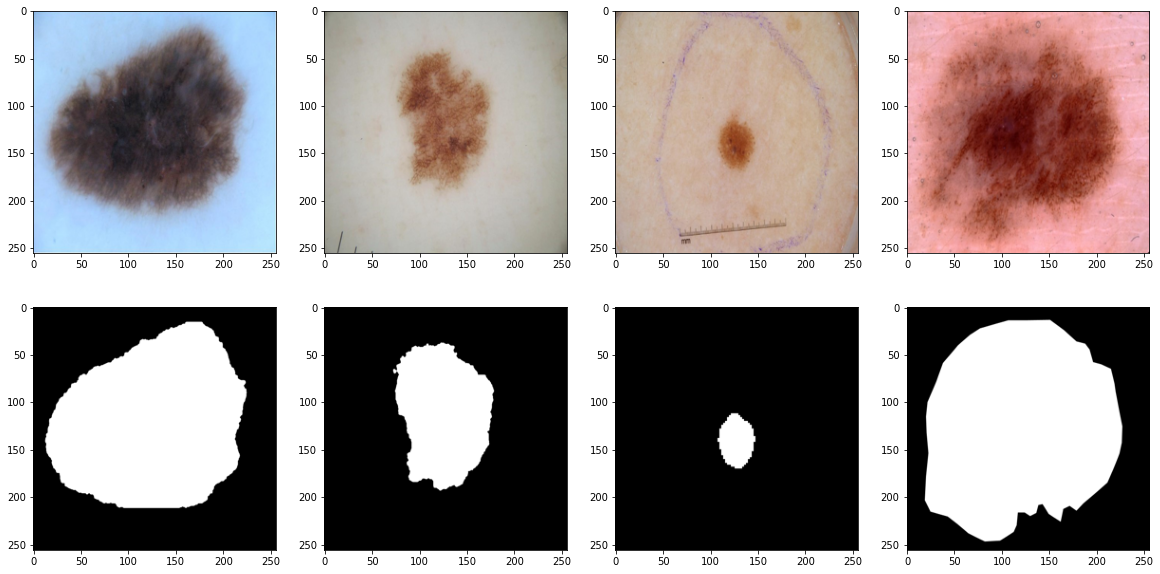

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.imshow(xTrain[0])
plt.subplot(2,4,2)
plt.imshow(xTrain[600])
plt.subplot(2,4,3)
plt.imshow(xTrain[1200])
plt.subplot(2,4,4)
plt.imshow(xTrain[1900])
plt.subplot(2,4,5)
plt.imshow(yTrain[0],cmap = plt.cm.binary_r)
plt.subplot(2,4,6)
plt.imshow(yTrain[600],cmap = plt.cm.binary_r)
plt.subplot(2,4,7)
plt.imshow(yTrain[1200],cmap = plt.cm.binary_r)
plt.subplot(2,4,8)
plt.imshow(yTrain[1900],cmap = plt.cm.binary_r)

In [8]:
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))


def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac)    
        

In [ ]:
print(xTrain.dtype)
print(yValid.dtype)
xTrain[1].shape

float32
float32


(480, 640, 3)

In [9]:
xTrain=xTrain.astype('float16')
yTrain=yTrain.astype('float16')
xValid=xValid.astype('float16')
yValid=yValid.astype('float16')

In [13]:
def fcn_net(epochs_num,learningRate):
    img_input = Input(shape= xTrain[1].shape)
    #C1############################
    x = Conv2D(64, (3, 3),activation='relu', padding='same', name='conv1',strides= (1,1))(img_input)
    x = Conv2D(64, (3, 3),activation='relu', padding='same', name='conv1-2',strides= (1,1))(img_input)
    x = MaxPooling2D()(x)
    #C2############################
    x = Conv2D(128, (3, 3),activation='relu', padding='same', name='conv2')(x)
    x = Conv2D(128, (3, 3),activation='relu', padding='same', name='conv2-2')(x)
    x = MaxPooling2D()(x)
    #C3############################
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv3')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv3-2')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv3-3')(x)
    x = MaxPooling2D()(x)
    #C4############################
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv4')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv4-2')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv4-3')(x)
    x = MaxPooling2D()(x)
    #C5############################
    x = Conv2D(512, (3, 3),activation='relu', padding='same', name='conv5')(x)
    x = Conv2D(512, (3, 3),activation='relu', padding='same', name='conv5-2')(x)
    x = Conv2D(512, (3, 3),activation='relu', padding='same', name='conv5-3')(x)
    x = MaxPooling2D()(x)
    #LAST THREE LAYERS
    x = Conv2D(512, (1, 1),activation='relu', padding='same', name='1d-1')(x)
    x = Conv2D(512, (1, 1),activation='relu', padding='same', name='1d-2')(x)
    x = Conv2D(2, (1, 1), activation = 'relu',padding='same', name='1d-3')(x)
    
    # Deconvolution Layers )
    x = Conv2DTranspose(1, (3, 3),strides = (32,32),activation='sigmoid', padding='same', name='deconv4')(x)
    pred = Reshape( yTrain[1].shape)(x)
    model = Model(inputs=img_input, outputs=pred)
    model.compile(optimizer= Adam(learning_rate = learningRate), loss= [jaccard_distance]
                  , metrics=[iou,accuracy])
    hist = model.fit(xTrain, yTrain, epochs= epochs_num, validation_data= (xValid, yValid), verbose=1)
    return model,hist

In [10]:
def fcn_net_mul_deconv(epochs_num,learningRate):

    # Convolution Layers 
    img_input = Input(shape= xTrain[1].shape)
    #C1#################################
    x = Conv2D(64, (3, 3),activation='relu', padding='same', name='conv1',strides= (1,1))(img_input)
    x = Conv2D(64, (3, 3),activation='relu', padding='same', name='conv1-2',strides= (1,1))(img_input)
    x = MaxPooling2D()(x)
    #C2#################################
    x = Conv2D(128, (3, 3),activation='relu', padding='same', name='conv2')(x)
    x = Conv2D(128, (3, 3),activation='relu', padding='same', name='conv2-2')(x)
    x = MaxPooling2D()(x)
    #C3############################
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv3')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv3-2')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv3-3')(x)
    x = MaxPooling2D()(x)
    #C4############################
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv4')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv4-2')(x)
    x = Conv2D(256, (3, 3),activation='relu', padding='same', name='conv4-3')(x)
    x = MaxPooling2D()(x)
    #C5############################
    x = Conv2D(512, (3, 3),activation='relu', padding='same', name='conv5')(x)
    x = Conv2D(512, (3, 3),activation='relu', padding='same', name='conv5-2')(x)
    x = Conv2D(512, (3, 3),activation='relu', padding='same', name='conv5-3')(x)
    x = MaxPooling2D()(x)
    #LAST THREE LAYERS
    x = Conv2D(512, (1, 1),activation='relu', padding='same', name='1d-1')(x)
    x = Conv2D(512, (1, 1),activation='relu', padding='same', name='1d-2')(x)
    x = Conv2D(2, (1, 1),activation='relu', padding='same', name='1d-3')(x)

    # Deconvolution Layers (BatchNorm after non-linear activation)
    x = Conv2DTranspose(1, (3, 3),strides=(2,2), activation = 'relu',padding='same', name='deconv1')(x)

    x = Conv2DTranspose(1, (3, 3),strides=(2,2), activation = 'relu',padding='same', name='deconv2')(x)

    x = Conv2DTranspose(1, (3, 3),strides=(2,2), activation = 'relu',padding='same', name='deconv3')(x)

    x = Conv2DTranspose(1, (3, 3),strides=(4,4),activation='sigmoid', padding='same', name='deconv4')(x)
    pred = Reshape( yTrain[1].shape)(x)
    model = Model(inputs=img_input, outputs=pred)
    
    model.compile(optimizer= Adam(learning_rate = learningRate), loss= [jaccard_distance]
                  , metrics=[iou,accuracy])
    #xTrain=np.array(xTrain,dtype='float32')
    
    hist = model.fit(xTrain, yTrain, epochs= epochs_num, validation_data= (xValid, yValid), verbose=1)
    

    
    return model,hist

In [11]:
modelDeconv ,histDeconv = fcn_net_mul_deconv(epochs_num= 10 ,learningRate = 0.1 )

Epoch 1/10
63/63 [==============================] - 73s 817ms/step - loss: 0.5589 - iou: 0.4411 - accuracy: 0.8002 - val_loss: 0.4836 - val_iou: 0.5164 - val_accuracy: 0.8039
Epoch 2/10
63/63 [==============================] - 40s 632ms/step - loss: 0.5290 - iou: 0.4710 - accuracy: 0.8005 - val_loss: 0.4826 - val_iou: 0.5174 - val_accuracy: 0.8039
Epoch 3/10
63/63 [==============================] - 40s 640ms/step - loss: 0.5285 - iou: 0.4715 - accuracy: 0.8003 - val_loss: 0.4823 - val_iou: 0.5177 - val_accuracy: 0.8039
Epoch 4/10
63/63 [==============================] - 40s 640ms/step - loss: 0.5283 - iou: 0.4717 - accuracy: 0.8007 - val_loss: 0.4822 - val_iou: 0.5178 - val_accuracy: 0.8039
Epoch 5/10
63/63 [==============================] - 40s 637ms/step - loss: 0.5282 - iou: 0.4718 - accuracy: 0.8010 - val_loss: 0.4821 - val_iou: 0.5179 - val_accuracy: 0.8039
Epoch 6/10
63/63 [==============================] - 40s 637ms/step - loss: 0.5281 - iou: 0.4719 - accuracy: 0.8013 - val_loss

In [10]:
modelDeconv ,histDeconv = fcn_net_mul_deconv(epochs_num= 10 ,learningRate = 0.01 )

Epoch 1/10
63/63 [==============================] - 72s 900ms/step - loss: 0.6598 - iou: 0.3402 - accuracy: 0.7800 - val_loss: 0.5799 - val_iou: 0.4201 - val_accuracy: 0.8033
Epoch 2/10
63/63 [==============================] - 51s 817ms/step - loss: 0.5776 - iou: 0.4224 - accuracy: 0.7865 - val_loss: 0.5457 - val_iou: 0.4543 - val_accuracy: 0.7738
Epoch 3/10
63/63 [==============================] - 51s 814ms/step - loss: 0.5510 - iou: 0.4490 - accuracy: 0.7886 - val_loss: 0.5365 - val_iou: 0.4635 - val_accuracy: 0.7476
Epoch 4/10
63/63 [==============================] - 51s 812ms/step - loss: 0.5406 - iou: 0.4594 - accuracy: 0.7914 - val_loss: 0.5037 - val_iou: 0.4963 - val_accuracy: 0.7873
Epoch 5/10
63/63 [==============================] - 51s 816ms/step - loss: 0.5362 - iou: 0.4638 - accuracy: 0.7916 - val_loss: 0.5128 - val_iou: 0.4872 - val_accuracy: 0.7684
Epoch 6/10
63/63 [==============================] - 52s 820ms/step - loss: 0.5335 - iou: 0.4665 - accuracy: 0.7923 - val_loss

In [9]:
modelDeconv ,histDeconv = fcn_net_mul_deconv(epochs_num= 10 ,learningRate = 0.03 )

Epoch 1/10
63/63 [==============================] - 73s 938ms/step - loss: 0.6008 - iou: 0.3992 - accuracy: 0.7844 - val_loss: 0.5362 - val_iou: 0.4638 - val_accuracy: 0.8039
Epoch 2/10
63/63 [==============================] - 51s 813ms/step - loss: 0.5368 - iou: 0.4632 - accuracy: 0.7967 - val_loss: 0.5283 - val_iou: 0.4717 - val_accuracy: 0.7393
Epoch 3/10
63/63 [==============================] - 51s 816ms/step - loss: 0.5314 - iou: 0.4686 - accuracy: 0.7966 - val_loss: 0.5348 - val_iou: 0.4652 - val_accuracy: 0.7312
Epoch 4/10
63/63 [==============================] - 51s 818ms/step - loss: 0.5297 - iou: 0.4703 - accuracy: 0.7999 - val_loss: 0.4895 - val_iou: 0.5105 - val_accuracy: 0.7827
Epoch 5/10
63/63 [==============================] - 51s 816ms/step - loss: 0.5290 - iou: 0.4710 - accuracy: 0.7995 - val_loss: 0.4948 - val_iou: 0.5052 - val_accuracy: 0.7822
Epoch 6/10
63/63 [==============================] - 51s 816ms/step - loss: 0.5291 - iou: 0.4709 - accuracy: 0.8024 - val_loss

In [10]:
modelDeconv ,histDeconv = fcn_net_mul_deconv(epochs_num= 50 ,learningRate = 0.03 )

Epoch 1/50
63/63 [==============================] - 55s 828ms/step - loss: 0.5976 - iou: 0.4024 - accuracy: 0.7892 - val_loss: 0.5200 - val_iou: 0.4800 - val_accuracy: 0.7826
Epoch 2/50
63/63 [==============================] - 51s 815ms/step - loss: 0.5377 - iou: 0.4623 - accuracy: 0.7957 - val_loss: 0.5527 - val_iou: 0.4473 - val_accuracy: 0.7265
Epoch 3/50
63/63 [==============================] - 51s 817ms/step - loss: 0.5321 - iou: 0.4679 - accuracy: 0.7976 - val_loss: 0.4888 - val_iou: 0.5112 - val_accuracy: 0.8016
Epoch 4/50
63/63 [==============================] - 51s 816ms/step - loss: 0.5306 - iou: 0.4694 - accuracy: 0.7979 - val_loss: 0.4925 - val_iou: 0.5075 - val_accuracy: 0.7859
Epoch 5/50
63/63 [==============================] - 51s 816ms/step - loss: 0.5296 - iou: 0.4704 - accuracy: 0.7998 - val_loss: 0.4912 - val_iou: 0.5088 - val_accuracy: 0.7966
Epoch 6/50
63/63 [==============================] - 51s 816ms/step - loss: 0.5292 - iou: 0.4708 - accuracy: 0.8018 - val_loss

In [11]:
modelDeconv ,histDeconv = fcn_net_mul_deconv(epochs_num= 10 ,learningRate = 0.05 )

Epoch 1/10
63/63 [==============================] - 55s 827ms/step - loss: 0.5799 - iou: 0.4201 - accuracy: 0.7971 - val_loss: 0.7040 - val_iou: 0.2960 - val_accuracy: 0.5427
Epoch 2/10
63/63 [==============================] - 51s 812ms/step - loss: 0.5314 - iou: 0.4686 - accuracy: 0.8054 - val_loss: 0.4847 - val_iou: 0.5153 - val_accuracy: 0.8034
Epoch 3/10
63/63 [==============================] - 51s 815ms/step - loss: 0.5293 - iou: 0.4707 - accuracy: 0.8031 - val_loss: 0.5858 - val_iou: 0.4142 - val_accuracy: 0.6842
Epoch 4/10
63/63 [==============================] - 51s 815ms/step - loss: 0.5288 - iou: 0.4712 - accuracy: 0.8002 - val_loss: 0.5194 - val_iou: 0.4806 - val_accuracy: 0.7566
Epoch 5/10
63/63 [==============================] - 51s 815ms/step - loss: 0.5281 - iou: 0.4719 - accuracy: 0.8081 - val_loss: 0.5087 - val_iou: 0.4913 - val_accuracy: 0.7631
Epoch 6/10
63/63 [==============================] - 51s 815ms/step - loss: 0.5279 - iou: 0.4721 - accuracy: 0.8099 - val_loss

In [14]:
model, hist = fcn_net(epochs_num= 1 ,learningRate = 0.003 )

63/63 [==============================] - 77s 1s/step - loss: 0.6986 - iou: 0.3014 - accuracy: 0.7892 - val_loss: 0.6507 - val_iou: 0.3493 - val_accuracy: 0.8003


In [ ]:
model, hist = fcn_net(epochs_num= 1 ,learningRate =1 )

(None, 8, 8, 2)
(None, 256, 256, 1)
(None, 256, 256, 1)
(None, 256, 256, 1)
63/63 [==============================] - 55s 829ms/step - loss: 0.5329 - iou: 0.4671 - accuracy: 0.7883 - val_loss: 0.4827 - val_iou: 0.5173 - val_accuracy: 0.8039


In [ ]:
model, hist = fcn_net(epochs_num= 1 ,learningRate = 0.03)

(None, 8, 8, 2)
(None, 256, 256, 1)
(None, 256, 256, 1)
(None, 256, 256, 1)
63/63 [==============================] - 57s 871ms/step - loss: 0.6133 - iou: 0.3867 - accuracy: 0.7960 - val_loss: 0.5848 - val_iou: 0.4152 - val_accuracy: 0.7990


In [ ]:
model, hist = fcn_net(epochs_num= 1 ,learningRate = 0.001)

(None, 8, 8, 2)
(None, 256, 256, 1)
(None, 256, 256, 1)
(None, 256, 256, 1)
63/63 [==============================] - 57s 865ms/step - loss: 0.7072 - iou: 0.2928 - accuracy: 0.7613 - val_loss: 0.6775 - val_iou: 0.3225 - val_accuracy: 0.8000


In [ ]:
model, hist = fcn_net(epochs_num= 1 ,learningRate = 0.1)

63/63 [==============================] - 75s 948ms/step - loss: 0.5609 - iou: 0.4391 - accuracy: 0.7963 - val_loss: 0.4885 - val_iou: 0.5115 - val_accuracy: 0.7988


In [ ]:
model, hist = fcn_net(epochs_num= 10 ,learningRate = 1)

Epoch 1/10
63/63 [==============================] - 75s 946ms/step - loss: 0.5388 - iou: 0.4612 - accuracy: 0.7954 - val_loss: 0.4827 - val_iou: 0.5173 - val_accuracy: 0.8039
Epoch 2/10
63/63 [==============================] - 53s 847ms/step - loss: 0.5291 - iou: 0.4709 - accuracy: 0.8005 - val_loss: 0.4865 - val_iou: 0.5135 - val_accuracy: 0.8008
Epoch 3/10
63/63 [==============================] - 53s 846ms/step - loss: 0.5288 - iou: 0.4712 - accuracy: 0.8008 - val_loss: 0.4918 - val_iou: 0.5082 - val_accuracy: 0.7972
Epoch 4/10
63/63 [==============================] - 53s 844ms/step - loss: 0.5286 - iou: 0.4714 - accuracy: 0.8011 - val_loss: 0.4912 - val_iou: 0.5088 - val_accuracy: 0.7978
Epoch 5/10
63/63 [==============================] - 53s 844ms/step - loss: 0.5286 - iou: 0.4714 - accuracy: 0.8009 - val_loss: 0.4829 - val_iou: 0.5171 - val_accuracy: 0.8035
Epoch 6/10
63/63 [==============================] - 53s 844ms/step - loss: 0.5289 - iou: 0.4711 - accuracy: 0.8002 - val_loss

In [ ]:
model, hist = fcn_net(epochs_num= 50 ,learningRate = 0.001)

<dtype: 'float32'>
Epoch 1/50
63/63 [==============================] - 39s 596ms/step - loss: 0.6171 - iou: 0.3829 - accuracy: 0.7545 - val_loss: 0.6152 - val_iou: 0.3848 - val_accuracy: 0.2582
Epoch 2/50
63/63 [==============================] - 37s 587ms/step - loss: 0.6080 - iou: 0.3920 - accuracy: 0.7458 - val_loss: 0.6296 - val_iou: 0.3704 - val_accuracy: 0.3393
Epoch 3/50
63/63 [==============================] - 37s 589ms/step - loss: 0.6044 - iou: 0.3956 - accuracy: 0.7459 - val_loss: 0.5504 - val_iou: 0.4496 - val_accuracy: 0.7321
Epoch 4/50
63/63 [==============================] - 37s 589ms/step - loss: 0.6027 - iou: 0.3973 - accuracy: 0.7466 - val_loss: 0.5447 - val_iou: 0.4553 - val_accuracy: 0.7179
Epoch 5/50
63/63 [==============================] - 37s 589ms/step - loss: 0.6017 - iou: 0.3983 - accuracy: 0.7476 - val_loss: 0.5586 - val_iou: 0.4414 - val_accuracy: 0.6801
Epoch 6/50
63/63 [==============================] - 37s 588ms/step - loss: 0.6006 - iou: 0.3994 - accuracy

**learning rate = 0.1 using adam optimizer on 50 epochs  --the loss doesn't decrease after 11 epochs**

In [ ]:
model, hist = fcn_net(epochs_num= 50 ,learningRate = 0.1)

Epoch 1/50
63/63 [==============================] - 56s 859ms/step - loss: 0.5616 - iou: 0.4384 - accuracy: 0.7849 - val_loss: 0.4828 - val_iou: 0.5172 - val_accuracy: 0.8039
Epoch 2/50
63/63 [==============================] - 53s 841ms/step - loss: 0.5325 - iou: 0.4675 - accuracy: 0.7984 - val_loss: 0.4922 - val_iou: 0.5078 - val_accuracy: 0.7969
Epoch 3/50
63/63 [==============================] - 53s 840ms/step - loss: 0.5299 - iou: 0.4701 - accuracy: 0.7996 - val_loss: 0.4922 - val_iou: 0.5078 - val_accuracy: 0.7969
Epoch 4/50
63/63 [==============================] - 53s 837ms/step - loss: 0.5292 - iou: 0.4708 - accuracy: 0.8009 - val_loss: 0.4922 - val_iou: 0.5078 - val_accuracy: 0.7969
Epoch 5/50
63/63 [==============================] - 53s 835ms/step - loss: 0.5290 - iou: 0.4710 - accuracy: 0.8002 - val_loss: 0.4911 - val_iou: 0.5089 - val_accuracy: 0.7976
Epoch 6/50
63/63 [==============================] - 53s 835ms/step - loss: 0.5289 - iou: 0.4711 - accuracy: 0.8002 - val_loss

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1-2 (Conv2D)            (None, 256, 256, 64)      1792      
                                                                 
 bn1 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation_18 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 128, 128, 128)     73856     
                                                           